# This script processes the sycl results of the level study

1. Compile parallelgpu using stage1tbbrem :
```
make bin/parallelgpu
```
2. Run the benchmarking script
```
cd scripts
python3 run_sycl_level
```
3. The output that we will process is owm_sycllev_coffee.csv



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename):
    results ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            name=tokens[0].split("/")[3][:-5]
            nth=int(tokens[1])
            level = int(tokens[4])
            if name not in results:
                results[name]={}
            if level not in results[name]:
                results[name][level]={}
            results[name][level][nth]=[float(tokens[5])] # tree construction time
            results[name][level][nth].append(float(tokens[6])) # tree copy time
            results[name][level][nth].append(float(tokens[7])) # owm time
            results[name][level][nth].append(float(tokens[11])) # accuracy

    #print(results)

    return results

res1=tokenize("owm_sycllev_coffee.csv")

#print(results)



In [11]:
#For the best level (see next cell) find the min and max accuracy for 1,2,4,6 and 8 threads
print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
for i,k in zip(res1,[5,8,8,8]):
    accuracy=[res1[i][k][j][3] for j in [1,2,4,6,8]]
    minaccuracy=min(accuracy)
    maxaccuracy=max(accuracy)
    print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Cloud & Min accuracy & Max accuracy\\ \hline
Alcoy & 99.34\% & 99.77\%\\ \hline
Arzua & 98.17\% & 98.87\%\\ \hline
BrionF & 99.33\% & 99.46\%\\ \hline
BrionU & 99.20\% & 99.24\%\\ \hline


In [10]:
for i in res1:
    times=[res1[i][j][1][2] for j in res1[i]]
    mintime=min(times)
    minlev=np.argmin(times)
    print("Cloud {} with baseline level {} has sequential OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][3][1][2] ))
    print("Cloud {} with best level {} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minlev],mintime ,res1[i][3][1][2]/mintime))


Cloud Alcoy with baseline level 3 has sequential OWM time = 1.04
Cloud Alcoy with best level 5 has sequential OWM best time (speedup) = 1.04 (1.00x)
Cloud Arzua with baseline level 3 has sequential OWM time = 1.48
Cloud Arzua with best level 8 has sequential OWM best time (speedup) = 1.11 (1.34x)
Cloud BrionF with baseline level 3 has sequential OWM time = 0.95
Cloud BrionF with best level 8 has sequential OWM best time (speedup) = 0.58 (1.65x)
Cloud BrionU with baseline level 3 has sequential OWM time = 1.10
Cloud BrionU with best level 8 has sequential OWM best time (speedup) = 0.67 (1.65x)


In [12]:
for i in res1:
    times=[res1[i][j][8][2] for j in res1[i]]
    mintime=min(times)
    minlev=np.argmin(times)
    print("Cloud {} with baseline level {} has 8-core OWM time = {:.2f}".format(i,list(res1[i].keys())[0],res1[i][3][8][2] ))
    print("Cloud {} with best level {} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minlev],mintime ,res1[i][3][8][2]/mintime))


Cloud Alcoy with baseline level 3 has 8-core OWM time = 0.21
Cloud Alcoy with best level 8 has 8-core OWM best time (speedup) = 0.21 (1.00x)
Cloud Arzua with baseline level 3 has 8-core OWM time = 0.29
Cloud Arzua with best level 8 has 8-core OWM best time (speedup) = 0.22 (1.33x)
Cloud BrionF with baseline level 3 has 8-core OWM time = 0.24
Cloud BrionF with best level 8 has 8-core OWM best time (speedup) = 0.14 (1.74x)
Cloud BrionU with baseline level 3 has 8-core OWM time = 0.29
Cloud BrionU with best level 8 has 8-core OWM best time (speedup) = 0.17 (1.78x)


In [13]:
for i in res1:
    times=[res1[i][j][1][0] for j in res1[i]]
    mintime=min(times)
    minlev=np.argmin(times)
    print("Cloud {} with level {} has qtree creation best time = {:.2f}".format(i,list(res1[i].keys())[minlev],mintime ))


Cloud Alcoy with level 5 has qtree creation best time = 0.73
Cloud Arzua with level 5 has qtree creation best time = 1.30
Cloud BrionF with level 3 has qtree creation best time = 1.78
Cloud BrionU with level 3 has qtree creation best time = 2.01


In [14]:
for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][1]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minlev=np.argmin(times)
    baselinetotaltime=res1[i][3][8][0]+res1[i][3][8][1]+res1[i][3][8][2]
    print("Cloud {} with baseline level {} has total (8-core owm + qtree creation) time = {:.2f}".format(i,list(res1[i].keys())[0],baselinetotaltime ))
    print("Cloud {} with best level {} has total (8-core owm + qtree creation) best time (speedup) = {:.2f} ({:.2f}x)".format(i,list(res1[i].keys())[minlev],mintime ,baselinetotaltime/mintime))


Cloud Alcoy with baseline level 3 has total (8-core owm + qtree creation) time = 0.57
Cloud Alcoy with best level 5 has total (8-core owm + qtree creation) best time (speedup) = 0.48 (1.19x)
Cloud Arzua with baseline level 3 has total (8-core owm + qtree creation) time = 0.80
Cloud Arzua with best level 5 has total (8-core owm + qtree creation) best time (speedup) = 0.71 (1.13x)
Cloud BrionF with baseline level 3 has total (8-core owm + qtree creation) time = 1.19
Cloud BrionF with best level 5 has total (8-core owm + qtree creation) best time (speedup) = 1.18 (1.01x)
Cloud BrionU with baseline level 3 has total (8-core owm + qtree creation) time = 1.51
Cloud BrionU with best level 5 has total (8-core owm + qtree creation) best time (speedup) = 1.37 (1.10x)


# Execution time for each cloud with sycl version depending on level

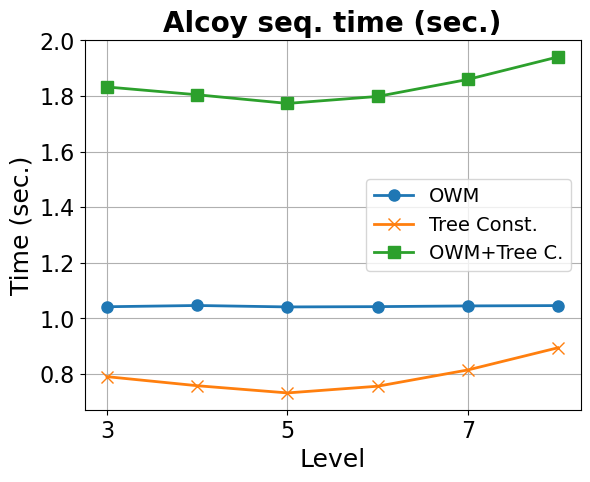

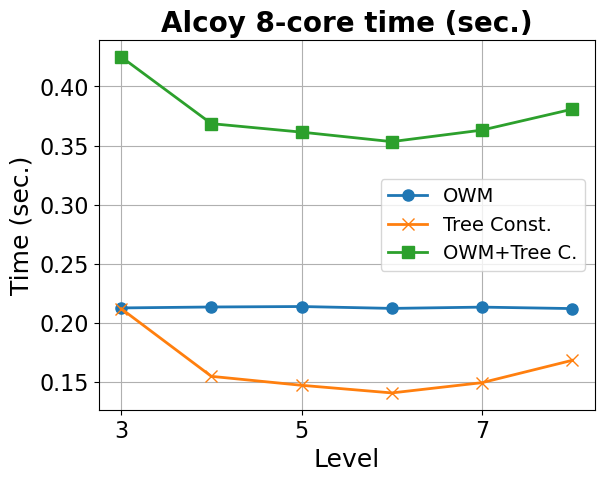

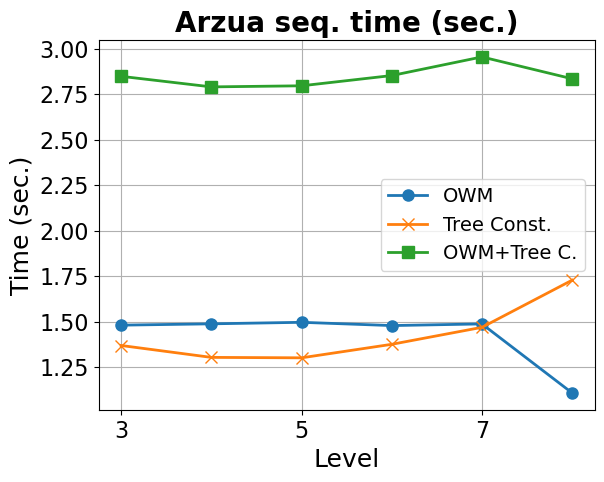

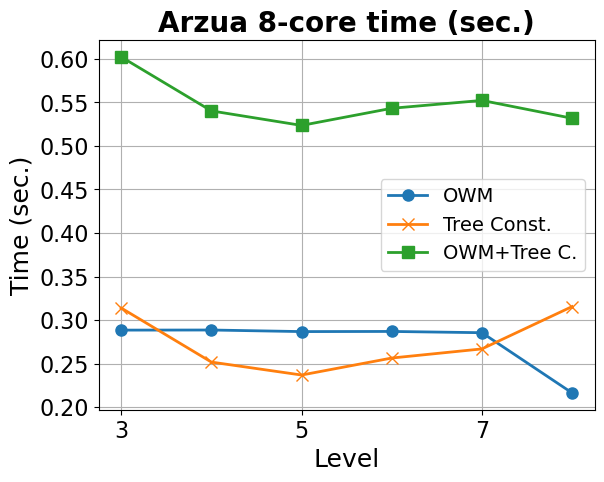

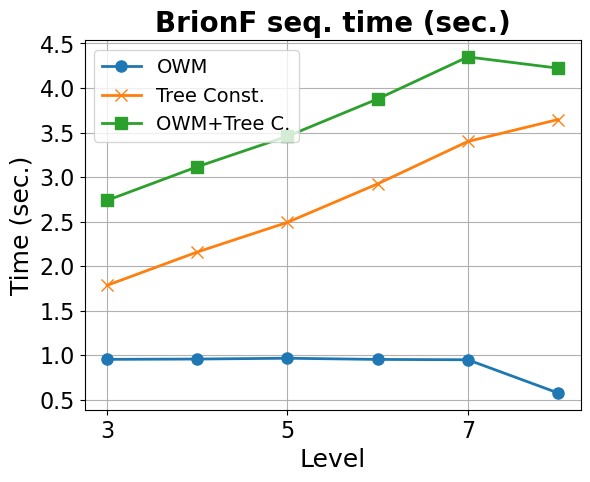

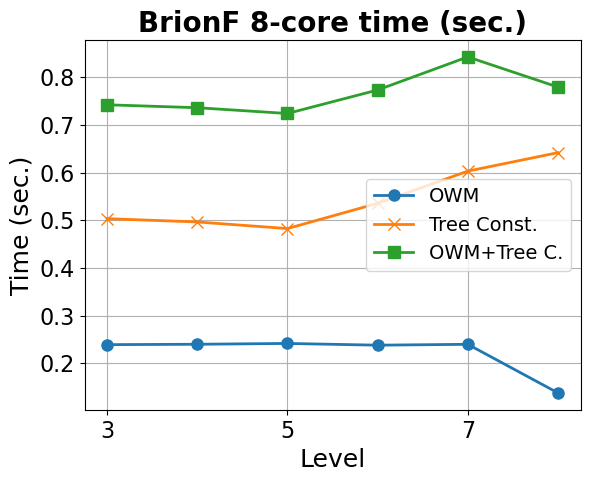

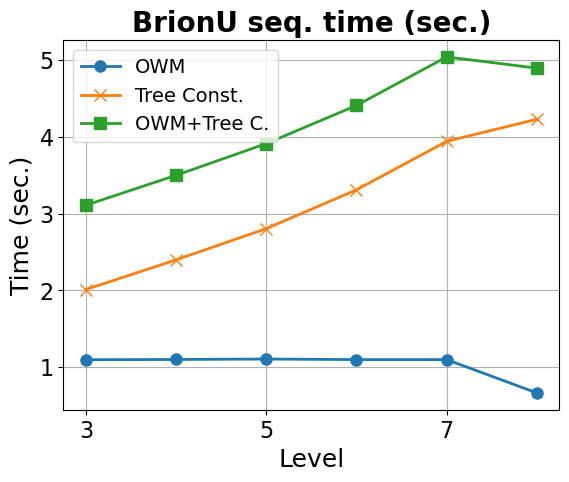

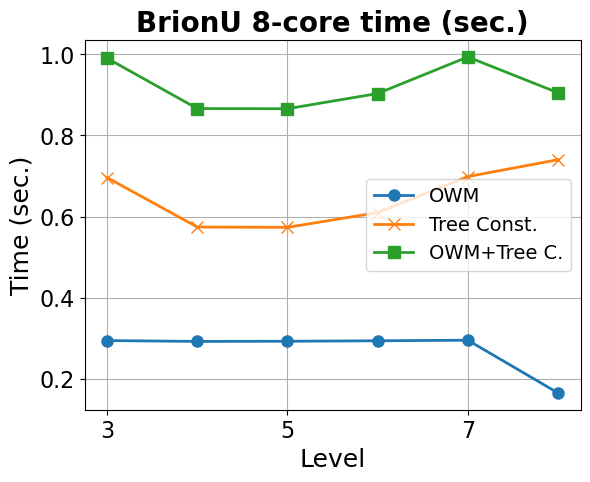

In [15]:
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth][0]+results[cloudname][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Tree Const.','OWM+Tree C.']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('Level', fontsize=xlabelfs)
    plt.xticks(x[::2],fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('Alcoy',1,res1)
plot_cloudtime('Alcoy',8,res1)
plot_cloudtime('Arzua',1,res1)
plot_cloudtime('Arzua',8,res1)
plot_cloudtime('BrionF',1,res1)
plot_cloudtime('BrionF',8,res1)
plot_cloudtime('BrionU',1,res1)
plot_cloudtime('BrionU',8,res1)

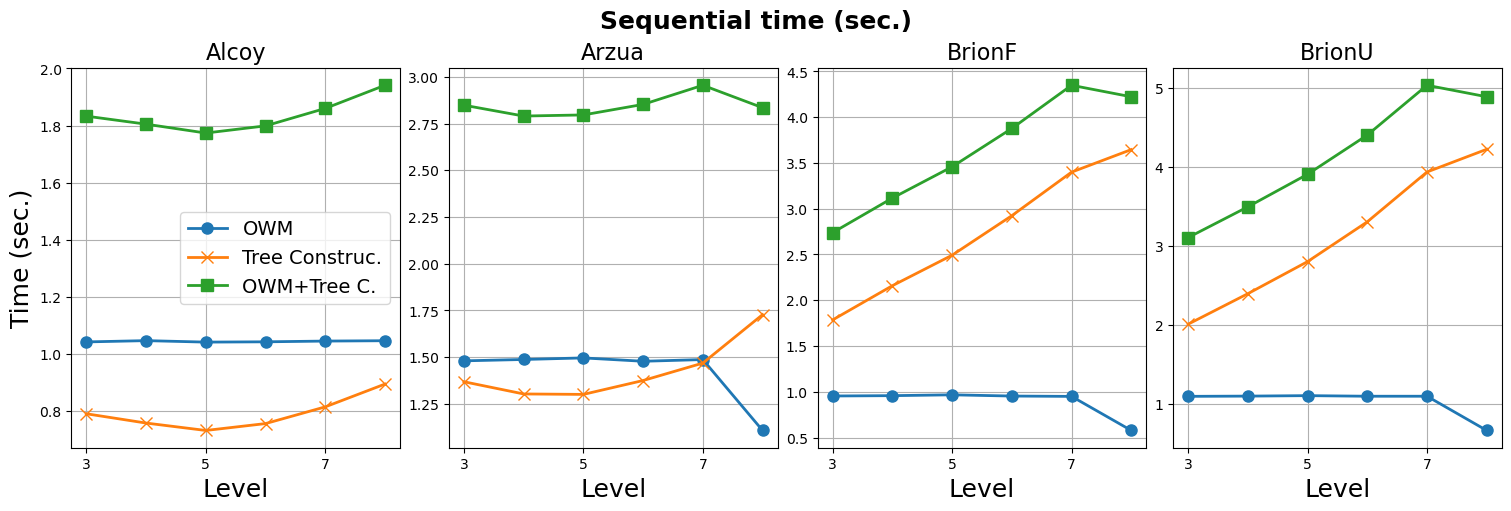

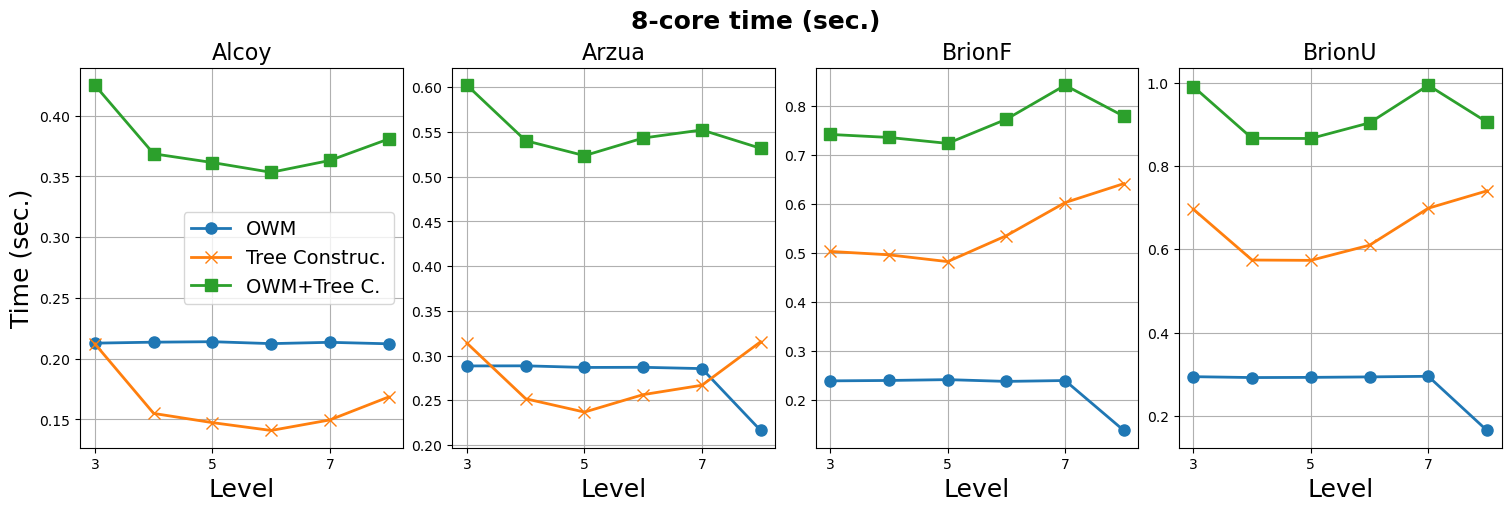

In [16]:
def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Tree Construc.','OWM+Tree C.']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):
        x=list(results[name].keys())
        axs[i].plot(np.array(x), np.array([results[name][i][nth][2] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth][0] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth][0]+results[name][i][nth][2] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Level', fontsize=xlabelfs)
        axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()

plot_alltimes(1,res1)
plot_alltimes(8,res1)


# Speed up (using total time) for the best level (for total time, that are [6,5,5,5])

[1.         1.84275448 2.75892476 4.07139627 5.36435412]
[1.         1.8855917  2.81458355 4.14542504 5.49073445]
[1.         1.87014997 2.99454796 4.02101873 5.16478683]
[1.         1.88032283 2.82140758 4.16958778 4.89065503]
[1.         1.78440333 2.59265532 3.79827527 4.90790929]
[1.         1.87879991 2.81303565 3.98986876 5.21610038]
[1.         1.88653155 2.67442961 3.66472397 4.00286608]
[1.         1.85851088 2.61325818 3.55973523 3.781919  ]
[1.         1.84275448 2.75892476 4.07139627 5.36435412]
[1.         1.8855917  2.81458355 4.14542504 5.49073445]
[1.         1.87014997 2.99454796 4.02101873 5.16478683]
[1.         1.88032283 2.82140758 4.16958778 4.89065503]


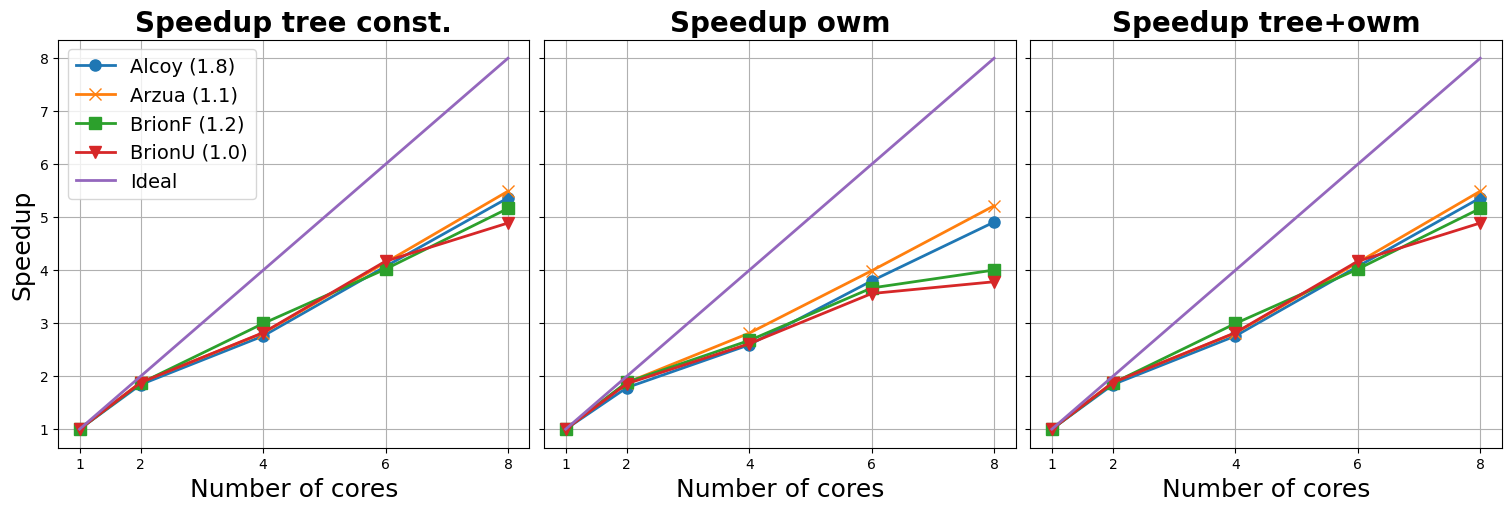

In [17]:
#Configuration variables
titlefs = 20
ylabelfs = 18
xlabelfs = 18
xticksfs = 16
yticksfs = 16
legendfs = 14
linew = 2
markers = 8

marks=['o-','x-','s-','v-','+-']
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True, sharey=True)

for (i,z,k) in zip(res1,marks,[6,5,5,5]):
    print(np.array([res1[i][k][1][0]/res1[i][k][j][0] for j in [1,2,4,6,8]]))
    axs[0].plot(np.array([1,2,4,6,8]), np.array([res1[i][k][1][0]/res1[i][k][j][0] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[0].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res1,marks,[6,5,5,5]):
    print(np.array([res1[i][k][1][2]/res1[i][k][j][2] for j in [1,2,4,6,8]]))
    axs[1].plot(np.array([1,2,4,6,8]), np.array([res1[i][k][1][2]/res1[i][k][j][2] for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[1].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)
for (i,z,k) in zip(res1,marks,[6,5,5,5]):
    print(np.array([sum(res1[i][k][1][0:2:2])/sum(res1[i][k][j][0:2:2]) for j in [1,2,4,6,8]]))
    axs[2].plot(np.array([1,2,4,6,8]), np.array([sum(res1[i][k][1][0:2:2])/sum(res1[i][k][j][0:2:2]) for j in [1,2,4,6,8]]), z, linewidth=linew, markersize=markers)
axs[2].plot(np.array([1,2,4,6,8]), np.array([1,2,4,6,8]), '-', linewidth=linew, markersize=markers)

sizes=['Alcoy (1.8)', 'Arzua (1.1)', 'BrionF (1.2)', 'BrionU (1.0)']
sizes.append('Ideal')
axs[0].legend(sizes,loc='best', fontsize= legendfs)
axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
axs[0].set_title('Speedup tree const.',  fontweight='bold', fontsize=titlefs)
axs[0].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[0].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[0].grid()
axs[1].set_title('Speedup owm',  fontweight='bold', fontsize=titlefs)
axs[1].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[1].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[1].grid()
axs[2].set_title('Speedup tree+owm',  fontweight='bold', fontsize=titlefs)
axs[2].set_xlabel('Number of cores', fontsize=xlabelfs)
axs[2].set_xticks([1,2,4,6,8],fontsize=xticksfs)
axs[2].grid()
#plt.yticks(fontsize=yticksfs)

#fig.suptitle('Speedup',fontweight='bold', fontsize=24)

In [49]:

pp = PdfPages("Speedup-qmin.pdf")
pp.savefig(fig)
pp.close()